# BatchNormalization

### 1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

Batch normalization is a technique used in artificial neural networks to improve the training process by normalizing the inputs to each layer.

This helps to stabilize the learning process and makes it less sensitive to the initial values of the network parameters.



### 2. Describe the benefits of using batch normalization during training.

Benefits of using batch normalization during training:

Improved training stability: Batch normalization helps to stabilize the training process by reducing the internal covariate shift.

This means that the distribution of the activations in each layer remains relatively constant throughout training, even if the weights and biases of the network are changing.

This makes the training process less sensitive to the initial values of the network parameters and helps to prevent the network from getting stuck in local minima.

Faster training: Batch normalization can help to speed up the training process by reducing the number of training epochs required to reach convergence.


Improved generalization performance: Batch normalization can help to improve the generalization performance of the network by reducing overfitting.

Reduced need for hyperparameter tuning: Batch normalization can help to reduce the need for hyperparameter tuning by making the network less sensitive to the specific values of the hyperparameters.

Overall, batch normalization is a powerful technique that can significantly improve the training process of deep neural networks. It is particularly effective in networks with many layers and/or a large number of parameters.

### 3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

Working principle of batch normalization:

Normalization step:
During training, batch normalization calculates the mean and variance of the activations in each mini-batch.
These statistics are then used to normalize the activations, so that they have a mean of 0 and a variance of 1.


Learnable parameters:
Batch normalization also introduces two learnable parameters for each layer: a scale parameter and a shift parameter.
The scale parameter is used to scale the normalized activations, and the shift parameter is used to shift the normalized activations.


Forward pass:
During the forward pass, the activations of each layer are normalized using the batch statistics and the learnable parameters.
This normalization helps to stabilize the training process and makes it less sensitive to the initial values of the network parameters.


Backward pass:
During the backward pass, the gradients of the loss function with respect to the normalized activations are calculated.
These gradients are then used to update the learnable parameters of the batch normalization layer.

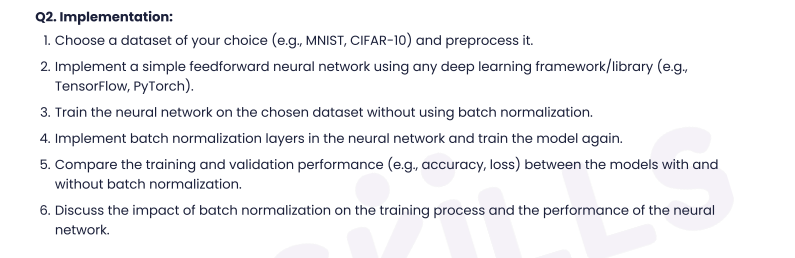

170498071/170498071 [==============================] - 6s 0us/step


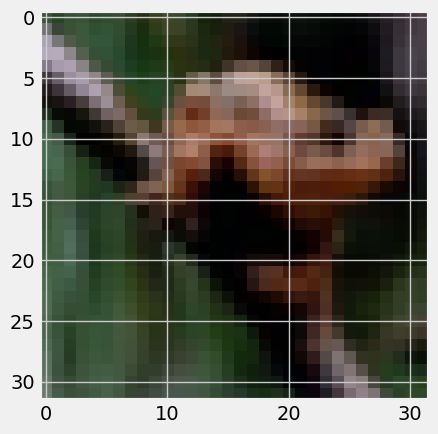

In [2]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
plt.style.use('fivethirtyeight')

## loading the dataset
(X_train_full, y_train_full),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

## Scaling the data
X_train_full=X_train_full/255.0
X_test=X_test/255.0

## validation and train split
X_valid, X_train=X_train_full[:5000],X_train_full[5000:]
y_valid, y_train=y_train_full[:5000],y_train_full[5000:]

## Visualizing
plt.imshow(X_train[0],cmap='binary')
plt.show()

## Details

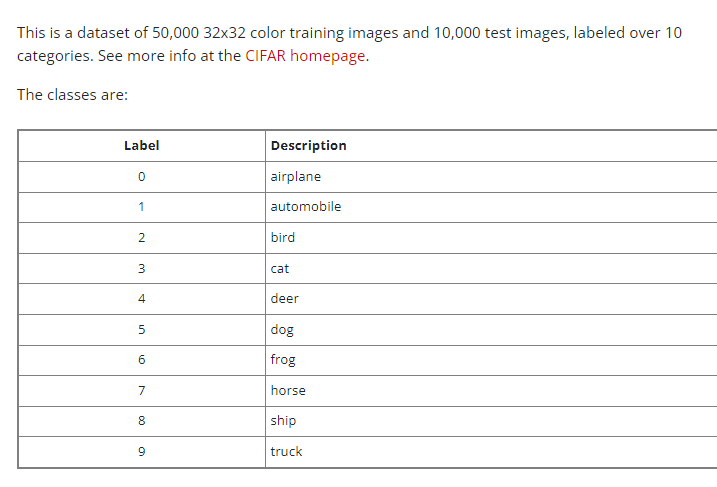

<Axes: >

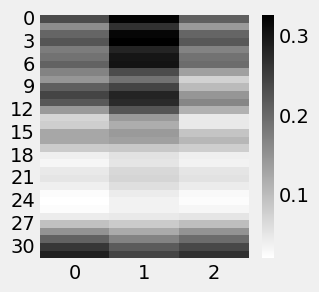

In [14]:
## how it appears to computers
plt.figure(figsize=(3,3))
sns.heatmap(X_train[0][0],cmap='binary')

In [24]:
## without BatchNormalization
LAYERS=[tf.keras.layers.Flatten(input_shape=[32,32,3],name="inputlayer"),
        tf.keras.layers.Dense(500,kernel_initializer='he_normal',name="hiddenlayer1"),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.20),
        tf.keras.layers.Dense(100,kernel_initializer='he_normal',name="hiddenlayer2"),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.10),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

model=tf.keras.models.Sequential(LAYERS)

## Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics='accuracy')

model.summary()

history=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

res1=pd.DataFrame(data=history.history)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 3072)              0         
                                                                 
 hiddenlayer1 (Dense)        (None, 500)               1536500   
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 500)               0         
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               50100     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 100)               0         
                                                                 
 dropout_2 (Dropout)         (None, 100)              

In [26]:
## with BatchNormalization
LAYERS1=[tf.keras.layers.Flatten(input_shape=[32,32,3],name="inputlayer"),
        tf.keras.layers.Dense(500,kernel_initializer='he_normal',name="hiddenlayer1"),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.20),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,kernel_initializer='he_normal',name="hiddenlayer2"),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.10),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

model1=tf.keras.models.Sequential(LAYERS1)

## Compiling the model
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics='accuracy')

model1.summary()

history1=model1.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

res2=pd.DataFrame(data=history1.history)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 3072)              0         
                                                                 
 hiddenlayer1 (Dense)        (None, 500)               1536500   
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 500)               0         
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 batch_normalization (Batch  (None, 500)               2000      
 Normalization)                                                  
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               50100     
                                                      

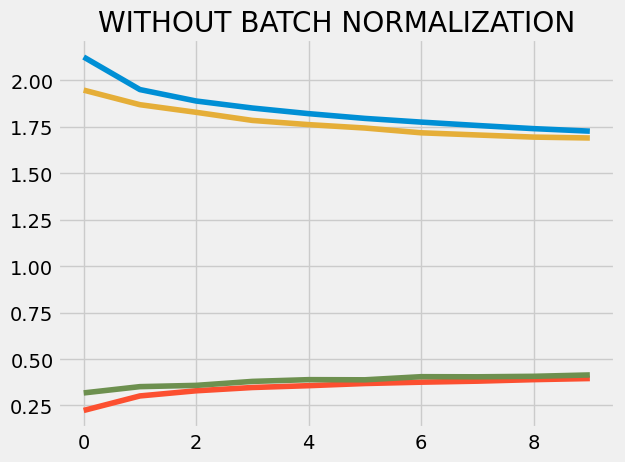

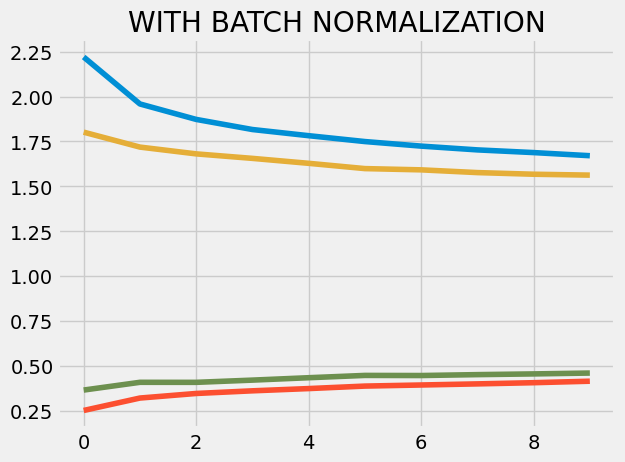

In [28]:
## Plotting
plt.plot(res1)
plt.title("WITHOUT BATCH NORMALIZATION")
plt.show()

plt.plot(res2)
plt.title("WITH BATCH NORMALIZATION")
plt.show()

### The impact of batch normalization on the training process and the performance of the neural network.

Impact on Training Process:
* The Training process with batch normalization was faster as compared to without BatchNormalization.
* The Gradient Flow was improved. By normalizing the inputs to each layer, it reduced the vanishing and exploding gradient problems, allowing for more stable and efficient training.

Impact on Performance:

* Better Accuracy: Batch normalization often leads to improved accuracy of the neural network. This is because it helps the network to learn more discriminative features and reduces overfitting.

* Improved Convergence: Batch normalization helps the network to converge more quickly to a good solution. This is because it makes the training process more stable and efficient.

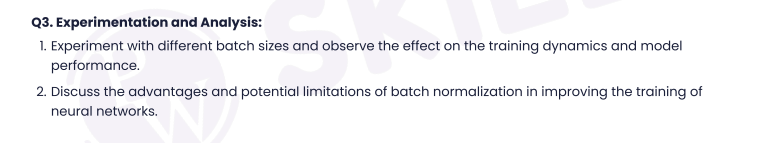

Epoch 1/10
900/900 [==============================] - 18s 20ms/step - loss: 1.6409 - accuracy: 0.4217 - val_loss: 1.5477 - val_accuracy: 0.4636
Epoch 2/10
900/900 [==============================] - 16s 18ms/step - loss: 1.6241 - accuracy: 0.4313 - val_loss: 1.5414 - val_accuracy: 0.4688
Epoch 3/10
900/900 [==============================] - 15s 17ms/step - loss: 1.6134 - accuracy: 0.4334 - val_loss: 1.5361 - val_accuracy: 0.4730
Epoch 4/10
900/900 [==============================] - 16s 18ms/step - loss: 1.6084 - accuracy: 0.4376 - val_loss: 1.5306 - val_accuracy: 0.4722
Epoch 5/10
900/900 [==============================] - 17s 19ms/step - loss: 1.6013 - accuracy: 0.4369 - val_loss: 1.5275 - val_accuracy: 0.4760
Epoch 6/10
900/900 [==============================] - 16s 17ms/step - loss: 1.5959 - accuracy: 0.4402 - val_loss: 1.5198 - val_accuracy: 0.4742
Epoch 7/10
900/900 [==============================] - 18s 20ms/step - loss: 1.5869 - accuracy: 0.4434 - val_loss: 1.5231 - val_accuracy:

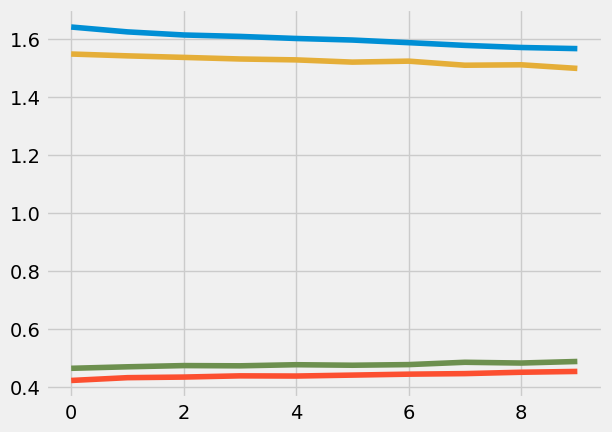

In [29]:
## Experimenting with batch size

history=model1.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid),batch_size=50)
b_50=pd.DataFrame(data=history.history)
plt.plot(b_50)

Epoch 1/10
225/225 [==============================] - 9s 38ms/step - loss: 1.5297 - accuracy: 0.4634 - val_loss: 1.4964 - val_accuracy: 0.4828
Epoch 2/10
225/225 [==============================] - 10s 42ms/step - loss: 1.5275 - accuracy: 0.4661 - val_loss: 1.4948 - val_accuracy: 0.4844
Epoch 3/10
225/225 [==============================] - 10s 43ms/step - loss: 1.5241 - accuracy: 0.4660 - val_loss: 1.4940 - val_accuracy: 0.4860
Epoch 4/10
225/225 [==============================] - 14s 62ms/step - loss: 1.5237 - accuracy: 0.4639 - val_loss: 1.4921 - val_accuracy: 0.4866
Epoch 5/10
225/225 [==============================] - 11s 49ms/step - loss: 1.5191 - accuracy: 0.4685 - val_loss: 1.4905 - val_accuracy: 0.4866
Epoch 6/10
225/225 [==============================] - 8s 37ms/step - loss: 1.5181 - accuracy: 0.4697 - val_loss: 1.4908 - val_accuracy: 0.4864
Epoch 7/10
225/225 [==============================] - 10s 42ms/step - loss: 1.5179 - accuracy: 0.4693 - val_loss: 1.4887 - val_accuracy: 0

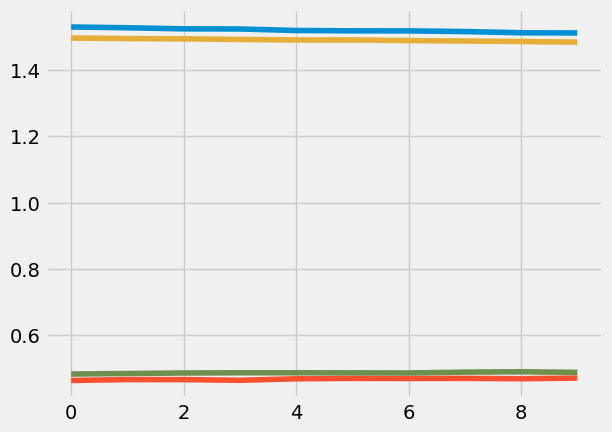

In [30]:
history=model1.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid),batch_size=200)
b_200=pd.DataFrame(data=history.history)
plt.plot(b_200)

Epoch 1/10
90/90 [==============================] - 9s 100ms/step - loss: 1.5029 - accuracy: 0.4716 - val_loss: 1.4826 - val_accuracy: 0.4900
Epoch 2/10
90/90 [==============================] - 8s 90ms/step - loss: 1.5002 - accuracy: 0.4741 - val_loss: 1.4816 - val_accuracy: 0.4884
Epoch 3/10
90/90 [==============================] - 8s 86ms/step - loss: 1.5027 - accuracy: 0.4749 - val_loss: 1.4812 - val_accuracy: 0.4896
Epoch 4/10
90/90 [==============================] - 9s 98ms/step - loss: 1.4985 - accuracy: 0.4776 - val_loss: 1.4805 - val_accuracy: 0.4904
Epoch 5/10
90/90 [==============================] - 7s 80ms/step - loss: 1.4962 - accuracy: 0.4784 - val_loss: 1.4801 - val_accuracy: 0.4906
Epoch 6/10
90/90 [==============================] - 8s 93ms/step - loss: 1.4966 - accuracy: 0.4777 - val_loss: 1.4808 - val_accuracy: 0.4888
Epoch 7/10
90/90 [==============================] - 8s 94ms/step - loss: 1.4920 - accuracy: 0.4774 - val_loss: 1.4797 - val_accuracy: 0.4908
Epoch 8/10
9

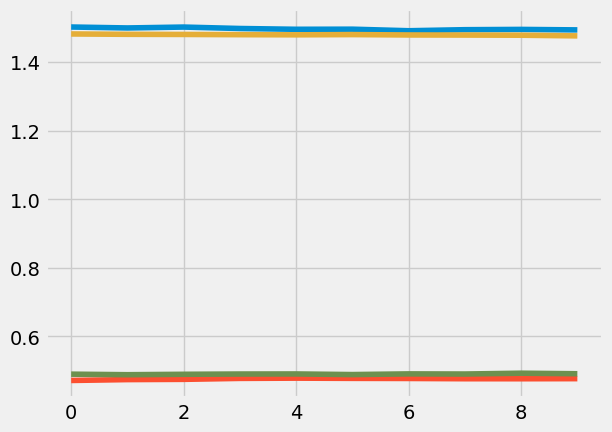

In [31]:
history=model1.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid),batch_size=500)
b_500=pd.DataFrame(data=history.history)
plt.plot(b_500)

Epoch 1/10
65/65 [==============================] - 8s 119ms/step - loss: 1.4931 - accuracy: 0.4761 - val_loss: 1.4777 - val_accuracy: 0.4912
Epoch 2/10
65/65 [==============================] - 8s 129ms/step - loss: 1.4908 - accuracy: 0.4782 - val_loss: 1.4775 - val_accuracy: 0.4922
Epoch 3/10
65/65 [==============================] - 8s 124ms/step - loss: 1.4924 - accuracy: 0.4776 - val_loss: 1.4771 - val_accuracy: 0.4918
Epoch 4/10
65/65 [==============================] - 9s 140ms/step - loss: 1.4925 - accuracy: 0.4770 - val_loss: 1.4769 - val_accuracy: 0.4912
Epoch 5/10
65/65 [==============================] - 8s 129ms/step - loss: 1.4926 - accuracy: 0.4757 - val_loss: 1.4762 - val_accuracy: 0.4924
Epoch 6/10
65/65 [==============================] - 7s 111ms/step - loss: 1.4905 - accuracy: 0.4788 - val_loss: 1.4756 - val_accuracy: 0.4956
Epoch 7/10
65/65 [==============================] - 8s 124ms/step - loss: 1.4893 - accuracy: 0.4784 - val_loss: 1.4758 - val_accuracy: 0.4914
Epoch 

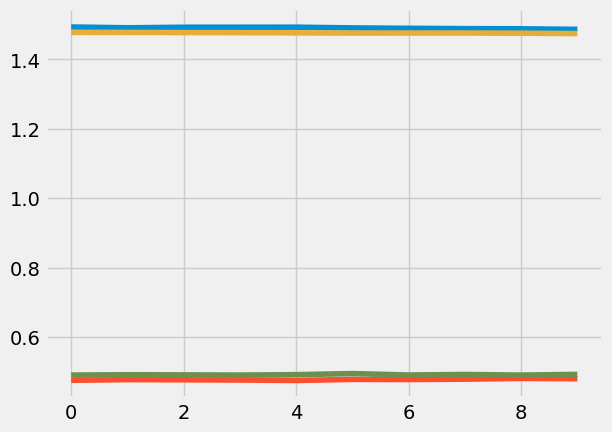

In [32]:
history=model1.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid),batch_size=700)
b_700=pd.DataFrame(data=history.history)
plt.plot(b_700)

## Insights about effect of Batch Size on Training Dynamics:

* Larger batches:

Smoother optimization landscape due to averaging over more data points.

Faster updates in the direction of the gradient.
More stable training process.

* Smaller batches:

Noisier optimization landscape due to fewer data points.

More erratic updates in the direction of the gradient.

Less stable training process.

## Insights about effect of Batch Size on Model Performance:

* Larger batches:

May lead to faster convergence to a local minimum.
May result in lower generalization performance due to overfitting.

* Smaller batches:

May lead to slower convergence to a local minimum.
May result in better generalization performance due to reduced overfitting.
Choosing the Right Batch Size:

**There is no one-size-fits-all answer.**
The optimal batch size depends on the specific dataset and model being used.
Generally, larger batch sizes are preferred for larger datasets and more complex models.
Smaller batch sizes may be preferred for smaller datasets and simpler models.
Experimentation is often necessary to find the best batch size for a particular problem.

### Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

Batch normalization is a technique used in neural network training that normalizes the inputs to each layer, reducing the internal covariate shift and improving training stability, speed, and generalization. However, it can increase computational cost and reduce expressiveness, and is less effective with small batch sizes.

## The End